In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.read_csv("news.csv")

In [118]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [119]:
df = df.drop("Unnamed: 0",axis = 'columns')
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [120]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [121]:
X = df['text']
y = df['label']

In [122]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=33) 

In [123]:
x_train.shape

(4751,)

In [124]:
y_test.shape

(1584,)

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df =0.7)
v_train = vectorizer.fit_transform(x_train)
v_train

<4751x59535 sparse matrix of type '<class 'numpy.float64'>'
	with 1246628 stored elements in Compressed Sparse Row format>

In [126]:
vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [127]:
v_test  = vectorizer.transform(x_test)
v_test

<1584x59535 sparse matrix of type '<class 'numpy.float64'>'
	with 410113 stored elements in Compressed Sparse Row format>

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model_lr = LogisticRegression(random_state=0)
model_lr.fit(v_train, y_train)
pred_lr = model_lr.predict(v_test)

In [129]:
score=accuracy_score(y_test,pred_lr)
score

0.9103535353535354

In [130]:
import matplotlib.pyplot as plt 
cm_lr=confusion_matrix(y_test,pred_lr)
cm_lr

array([[734,  50],
       [ 92, 708]], dtype=int64)

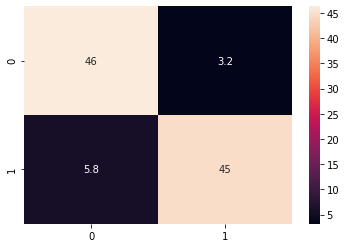

In [131]:
sns.heatmap(cm_lr*100/np.sum(cm_lr), annot=True)
plt.show()

# KNeighbors Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(v_train,y_train)  
pred_knn = knn.predict(v_test)  

In [133]:
score=accuracy_score(y_test,pred_knn)
score

0.8421717171717171

In [134]:
cm_knn=confusion_matrix(y_test,pred_knn)
cm_knn

array([[692,  92],
       [158, 642]], dtype=int64)

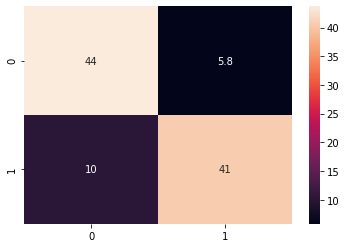

In [135]:
sns.heatmap(cm_knn*100/np.sum(cm_knn), annot=True)
plt.show()

# Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9)
dt.fit(v_train,y_train) 
pred_dt= dt.predict(v_test) 

In [137]:
score=accuracy_score(y_test,pred_dt)
score

0.827020202020202

In [138]:
cm_dt=confusion_matrix(y_test,pred_dt)
cm_dt

array([[647, 137],
       [137, 663]], dtype=int64)

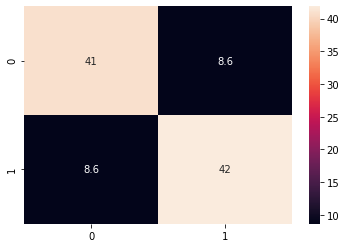

In [139]:
sns.heatmap(cm_dt*100/np.sum(cm_dt), annot=True)
plt.show()